In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# lets load the house pricing dataset

In [39]:
from sklearn.datasets import fetch_california_housing

# Load the data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

print(housing.data)


[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [40]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [41]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# preparing the data

In [42]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
# df.drop("Population2", axis=1, inplace=True)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
#summarizing the stats of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,3.676411,28.373066,5.361708,1.096621,1441.368485,3.096560,35.651872,-119.562378,1.920553
std,1.570602,12.504050,2.293321,0.452136,1144.075196,10.639195,2.150066,2.005760,0.971109
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526300,18.000000,4.416667,1.005882,796.000000,2.446614,33.930000,-121.760000,1.164750
50%,3.449050,28.000000,5.185730,1.048576,1179.000000,2.837779,34.270000,-118.500000,1.736000
75%,4.582500,37.000000,5.971083,1.099222,1746.250000,3.306021,37.730000,-117.990000,2.479000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.991000


In [46]:
#check the missing values 
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [47]:
#(EDA) exploratory data analysis
#correlation
df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

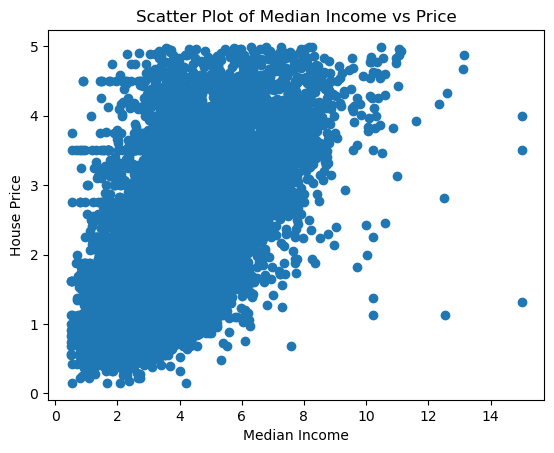

In [177]:
import matplotlib.pyplot as plt
plt.scatter(df['MedInc'], df['price'])  # Use correct column names!
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Scatter Plot of Median Income vs Price')
plt.show()


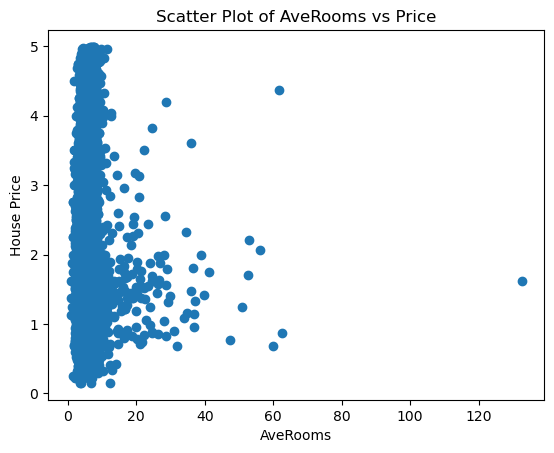

In [178]:
import matplotlib.pyplot as plt
plt.scatter(df['AveRooms'], df['price'])  # Use correct column names!
plt.xlabel('AveRooms')
plt.ylabel('House Price')
plt.title('Scatter Plot of AveRooms vs Price')
plt.show()


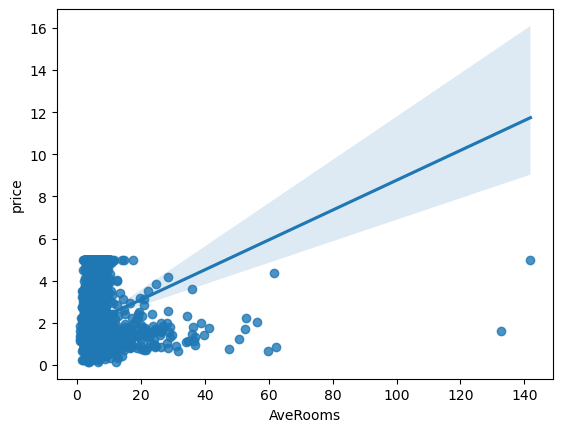

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="AveRooms",y="price",data=df)

plt.show()


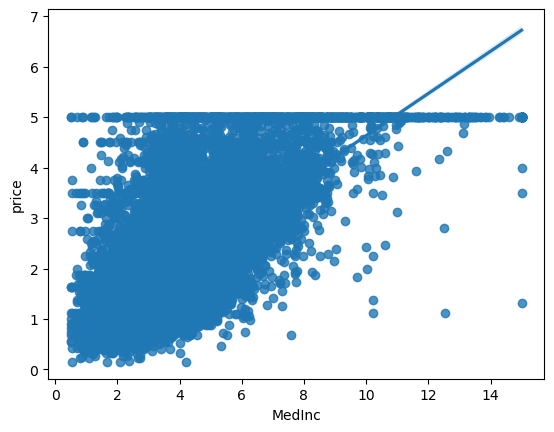

In [132]:
sns.regplot(x="MedInc",y="price",data=df)
plt.show()

In [10]:
import numpy as np
df['log_AveRooms']=np.log1p(df['AveRooms'])

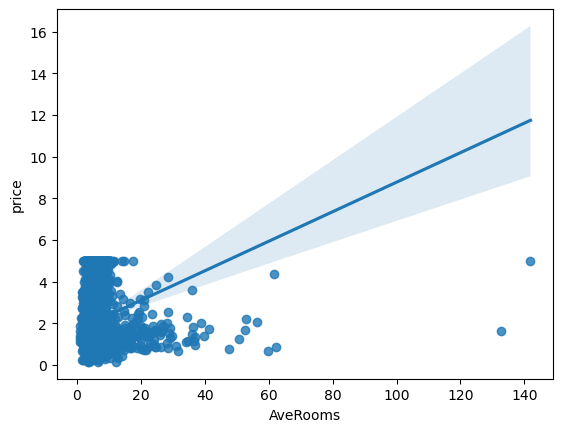

In [48]:
sns.regplot(x="AveRooms",y="price",data=df)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15540\1525425277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MedInc2'] = df['MedInc'] ** 2


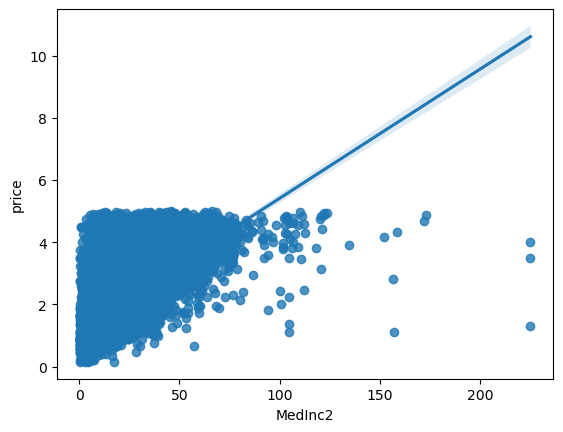

In [49]:
df = df[df['price'] < 5.0]
df['MedInc2'] = df['MedInc'] ** 2
sns.regplot(x="MedInc2",y="price",data=df)
plt.show()

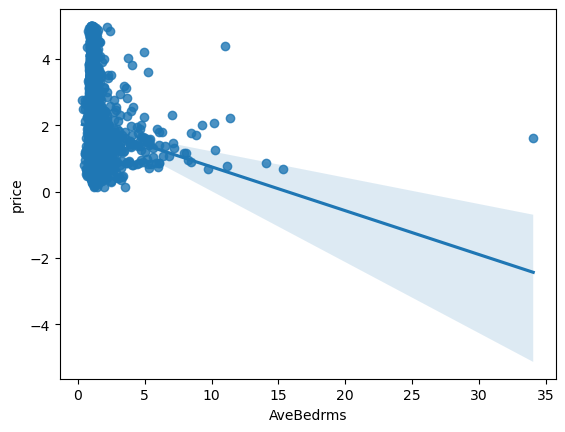

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="AveBedrms",y="price",data=df)

plt.show()

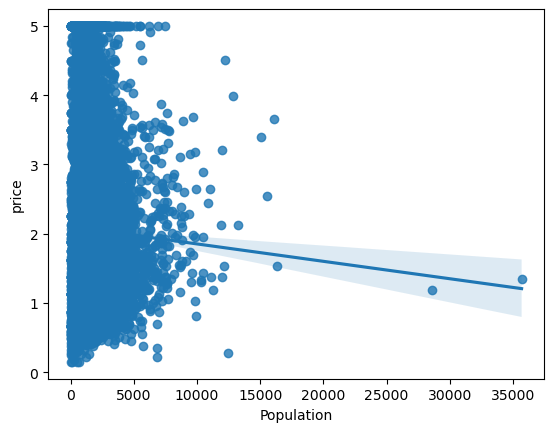

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Population",y="price",data=df)

plt.show()

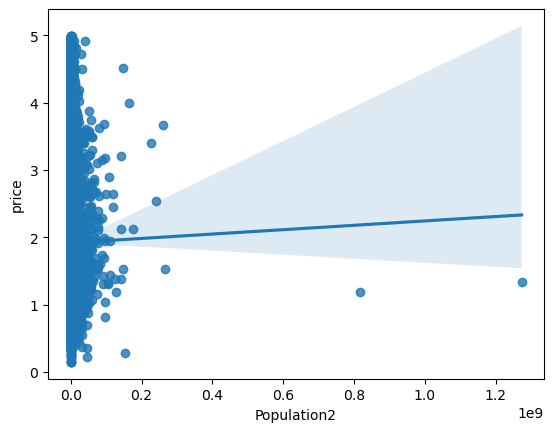

In [29]:
df = df[df['price'] < 5.0]
df['Population2'] = df['Population'] ** 2
sns.regplot(x="Population2",y="price",data=df)
plt.show()

In [62]:
#independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [63]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [64]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 19648, dtype: float64

In [65]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [66]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12794,1.6607,20.0,4.625000,0.984756,1287.0,3.923780,38.64,-121.46
14570,3.4482,35.0,4.420744,0.980431,1340.0,2.622309,32.83,-117.21
9328,3.9917,35.0,4.609137,0.984772,413.0,2.096447,37.96,-122.53
5102,2.7401,41.0,5.412000,1.144000,751.0,3.004000,33.94,-118.31
1822,6.5160,32.0,7.515152,1.012987,602.0,2.606061,37.92,-122.29
...,...,...,...,...,...,...,...,...
11877,3.3687,45.0,5.594175,0.998058,1470.0,2.854369,34.00,-117.38
12563,2.9769,43.0,5.082927,1.017073,912.0,2.224390,38.54,-121.43
5631,2.9063,47.0,4.723077,1.061538,374.0,5.753846,33.77,-118.28
870,3.5714,5.0,4.693878,1.269388,648.0,2.644898,37.49,-121.93


In [67]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8979,5.0357,45.0,4.870620,0.956873,883.0,2.380054,34.00,-118.42
17945,4.7604,36.0,5.194444,0.882716,740.0,2.283951,37.33,-121.95
17356,4.8359,18.0,6.557592,0.984293,1162.0,3.041885,34.87,-120.42
3378,3.0795,8.0,4.052402,1.101892,3565.0,2.594614,34.25,-118.29
15797,3.6031,52.0,3.702592,1.062756,1438.0,1.961801,37.77,-122.43
...,...,...,...,...,...,...,...,...
15728,3.6667,52.0,4.863636,1.047847,2198.0,5.258373,37.78,-122.45
9448,2.8750,13.0,6.490260,1.217532,750.0,2.435065,37.46,-119.72
54,1.6098,52.0,5.021459,1.008584,701.0,3.008584,37.82,-122.28
8095,1.9311,17.0,4.231438,1.052133,3030.0,2.393365,33.82,-118.22


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [73]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [74]:
X_train


array([[-1.28321544, -0.67451143, -0.3129519 , ...,  0.06695351,
         1.381953  , -0.94167667],
       [-0.14651851,  0.52401112, -0.39885582, ..., -0.04259981,
        -1.31780558,  1.18022803],
       [ 0.19910095,  0.52401112, -0.31962336, ..., -0.08686509,
         1.06597437, -1.47589738],
       ...,
       [-0.49112051,  1.48282916, -0.27170377, ...,  0.22100208,
        -0.88101159,  0.64600732],
       [-0.06817386, -1.87303398, -0.28398412, ..., -0.04069837,
         0.84757738, -1.17633436],
       [ 0.50745583, -1.87303398,  0.69159605, ...,  0.03099612,
         0.98697972, -0.82185146]])

In [70]:
X_test

array([[ 0.86299555,  1.32302615, -0.20965172, ..., -0.06299202,
        -0.77413647,  0.57610928],
       [ 0.68792833,  0.60391262, -0.07346113, ..., -0.07108166,
         0.77322947, -1.1863198 ],
       [ 0.73593986, -0.83431444,  0.49983653, ..., -0.0072814 ,
        -0.36986969, -0.4224341 ],
       ...,
       [-1.31558349,  1.88233667, -0.14621337, ..., -0.01008457,
         1.00091995, -1.35107946],
       [-1.1112642 , -0.91421594, -0.4784721 , ..., -0.06187155,
        -0.85777787,  0.67596362],
       [ 0.9413402 ,  0.52401112, -0.07812222, ..., -0.07597604,
        -0.85777787,  0.59608015]])

# model training

In [71]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [186]:
#print the coefficient and the intercept
print(regression.coef_)

[ 0.67344755  0.09952307 -0.24637968  0.27466386  0.00584029 -0.0370303
 -0.8088429  -0.78550769]


In [187]:
print(regression.intercept_)

1.9205323813462274


In [188]:
#on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [189]:
#prediction with test data
reg_pred=regression.predict(X_test)
reg_pred

array([2.77716494, 2.64363229, 2.77467155, ..., 1.45517668, 1.34625095,
       2.83096047])

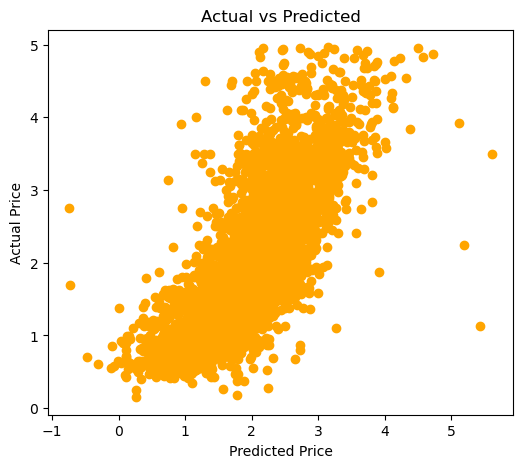

In [191]:
#plot a scatter plot for the prediction
plt.figure(figsize=(6,5))
plt.scatter(reg_pred, y_test, color='orange')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted")
plt.show()

In [190]:
print("Min:", y.min())
print("Max:", y.max())
print("Unique:", np.unique(y))


Min: 0.14999
Max: 4.991
Unique: [0.14999 0.175   0.225   ... 4.988   4.99    4.991  ]


In [192]:
import numpy as np

reg_pred_clipped = np.clip(reg_pred, 0, 5)


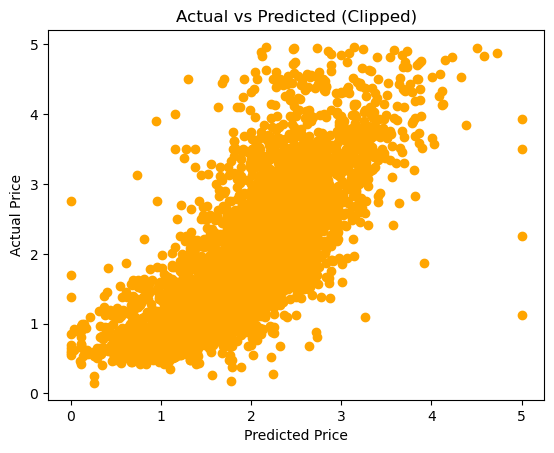

In [193]:
import matplotlib.pyplot as plt

plt.scatter(reg_pred_clipped, y_test, color='orange')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted (Clipped)")
plt.show()


In [194]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
reg_pred = model.predict(X_test)
reg_pred_clipped = np.clip(reg_pred, 0, 5)


In [195]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))


AttributeError: 'Series' object has no attribute 'reshape'

In [196]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, reg_pred_clipped))
print("RMSE:", np.sqrt(mean_squared_error(y_test, reg_pred_clipped)))


R² Score: 0.7741792358493005
RMSE: 0.4652962625046996


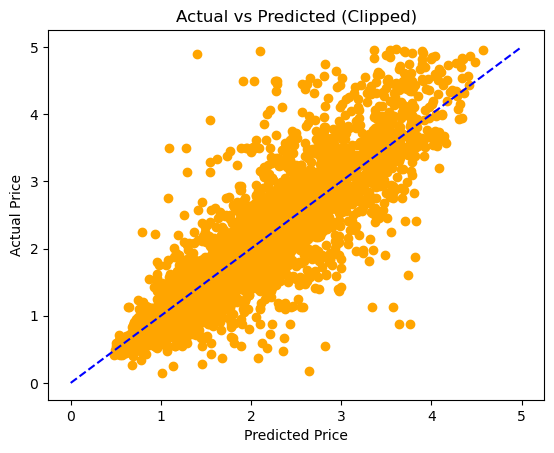

In [197]:
plt.scatter(reg_pred_clipped, y_test, color='orange')
plt.plot([0, 5], [0, 5], color='blue', linestyle='--')  # reference line
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted (Clipped)")
plt.show()


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
# grid.fit(X_train, y_train)
# print("Best R²:", grid.best_score_)


In [198]:
#residuals
residuals=y_test-reg_pred

In [199]:
residuals

8979     0.01423
17945   -0.08658
17356    0.07453
3378    -0.69842
15797   -0.82430
          ...   
15728    0.89510
9448    -0.18927
54      -0.24446
8095    -0.20193
8671     0.67311
Name: price, Length: 3930, dtype: float64

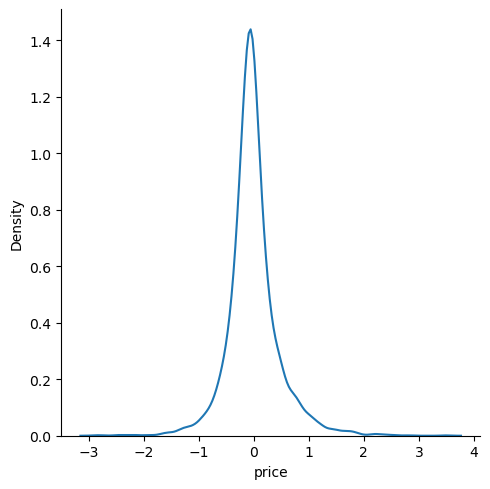

In [200]:
#plotting this residuals
import seaborn as sns
sns.displot(residuals,kind="kde")
plt.show()

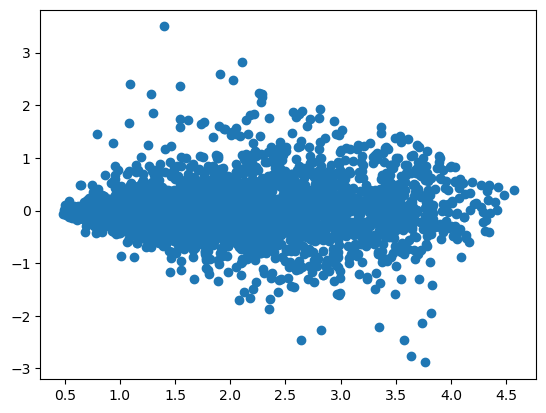

In [201]:
#scatter plot with respect to pred and residual
plt.scatter(reg_pred,residuals)
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.311190996870229
0.21650061190084227
0.4652962625046996


# R square and adjusted R square 

In [203]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7741792358493005


In [204]:
#display adjusted R-Squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7737184946829639

# new data prediction

In [209]:
housing.data[1].reshape(1,-1)

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02]])

In [210]:
scaler.transform(housing.data[1].reshape(1,-1))

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02]])

In [212]:
regression.predict(scaler.transform(housing.data[1].reshape(1,-1)))

array([87.65742163])

# pickling the model file for deployment

In [213]:
import pickle

In [214]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [215]:
pickle_model=pickle.load(open('regmodel.pkl','rb'))

In [223]:
#prediction
pickle_model.predict(scaler.transform(housing.data[19].reshape(1,-1)))

array([77.17427161])